# **Sales Performance & Revenue Analysis:**

In [832]:
import pandas as pd
file_path = 'C:/Users/loydt/Downloads/clean_data.csv'
df = pd.read_csv(file_path)

In [520]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,2024-04-20,Overnight,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,35.56


-------------------

## **Overall Sales Trends:**

In [650]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

**Monthly Sales**

In [651]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

df = df.rename(columns={'Total Price': 'Sales'})

In [558]:
completed = df[df['Order Status'] == 'Completed'].copy()
sales = completed.groupby(['Month'], observed=False)['Sales'].sum().reset_index()

sales

,Month,Sales
0,Jan,4151580.21
1,Feb,3671593.52
2,Mar,3791908.57
3,Apr,3909413.45
4,May,4190531.68
5,Jun,4134347.83
6,Jul,4247826.32
7,Aug,4094652.78
8,Sep,3354749.90
9,Oct,1555325.86


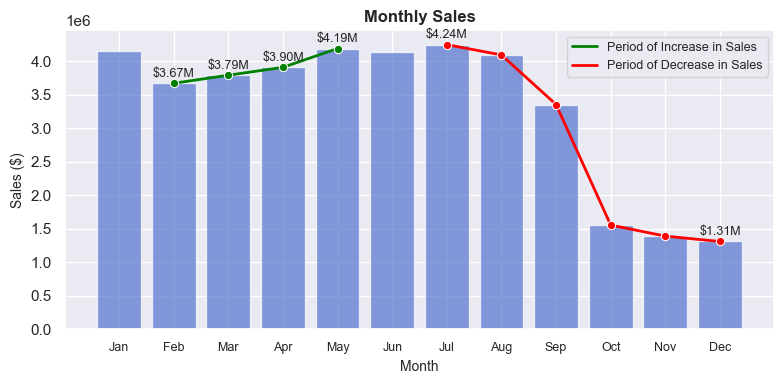

In [ ]:
from adjustText import adjust_text 

increase = ['Feb', 'Mar', 'Apr', 'May']
increase_sales = sales[sales['Month'].isin(increase)]
decrease = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
decrease_sales = sales[sales['Month'].isin(decrease)]

sales_values = {
    'Feb': "$3.67M", 
    'Mar': "$3.79M", 
    'Apr': "$3.90M", 
    'May': "$4.19M", 
    'Jul': "$4.24M", 
    #'Aug': "$4.09M", 
    #'Sep': "$3.35M", 
    #'Oct': "$1.55M", 
    #'Nov': "$1.39M", 
    'Dec': "$1.31M"
}

plt.figure(figsize=(8, 4))  
sns.barplot(data=sales, x='Month', y='Sales', color='royalblue', alpha=0.7)
sns.lineplot(data=increase_sales, x='Month', y='Sales', color='green', marker='o', linewidth=2)
sns.lineplot(data=decrease_sales, x='Month', y='Sales', color='red', marker='o', linewidth=2)

for index, row in sales.iterrows():
    if row['Month'] in sales_values:
        plt.text(index, row['Sales'] + 50000, sales_values[row['Month']], ha='center', va='bottom', fontsize=9)

plt.xlabel("Month", fontsize=10)  
plt.ylabel("Sales ($)", fontsize=10)  
plt.title("Monthly Sales", fontsize=12, fontweight="bold")
legend_labels = [
    "Period of Increase in Sales",
    "Period of Decrease in Sales",
]

legend_colors = ['green', 'red']
legend_handles = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors]
plt.xticks(fontsize=9) # fontsize=9
#plt.legend(legend_handles, legend_labels, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)  
plt.legend(handles=legend_handles, labels=legend_labels, fontsize=9)
plt.grid(True)
plt.tight_layout()

plt.show()

### **1. What are the periods of growth, stability, and decline in sales throughout the year?**

**Monthly Sales Trend Report**

**📈 1. Period of Increase (Feb – May):**

- **February**: $3.67M 📊  
- **March**: $3.79M 📈  
- **April**: $3.90M 📈  
- **May**: $4.19M 🚀  

This period shows a gradual and steady rise in sales, with increases each month.  

**📊 2. Period of Stability (May – July):**  

- **June**: $4.13M ➖  
- **July**: $4.24M ➖  

This period indicates a phase where sales remained within a close range, showing a plateau.  

**📉 3. Period of Decrease (July – Dec):**  

- **July**: $4.24M 📉  
- **August**: $4.09M 📉  
- **September**: $3.35M 📉  
- **October**: $1.55M 📉  
- **November**: $1.39M 📉  
- **December**: $1.31M 📉  

The decline became more significant starting in August, with the lowest point reached by December.


----

In [525]:
product_review = completed.groupby('Product Type')['Sales'].sum().reset_index()
product_review = product_review.sort_values(by="Sales", ascending=False)
product_review

,Product Type,Sales
2,Smartphone,11580289.76
3,Smartwatch,9398591.23
1,Laptop,8365905.25
4,Tablet,7722632.25
0,Headphones,2734651.00


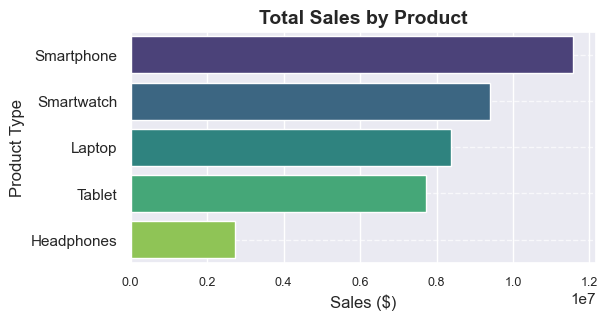

In [838]:
plt.figure(figsize=(6, 3))  
sns.barplot(data=product_review, x="Sales", y="Product Type", hue="Product Type", palette="viridis", legend=False)
plt.xlabel("Sales ($)", fontsize=12)
plt.ylabel("Product Type", fontsize=12)
plt.title("Total Sales by Product", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=9)   

plt.show()

### **2. Which product types generate the most revenue?**

**📊 Product Revenue Review**

1. **📱 Smartphone:** Smartphones clearly generate the most revenue. 
2. **⌚ Smartwatch:** Smartwatches come in second place in terms of revenue generation.  
3. **💻 Laptop:** Laptops generate slightly more revenue than tablets.  
4. **📟 Tablet:** Tablets generated less revenue than laptops.  
5. **🎧 Headphones:** Headphones generate the least revenue.



---

In [587]:
sales_analysis = df.groupby(['Month', 'Order Status'], observed=False)['Sales'].sum().reset_index()
sales_analysis = sales_analysis.sort_values('Month').reset_index(drop=True)

sales_analysis.head()


,Month,Order Status,Sales
0,Jan,Cancelled,1952317.22
1,Jan,Completed,4151580.21
2,Feb,Cancelled,1784020.62
3,Feb,Completed,3671593.52
4,Mar,Cancelled,1953501.83


In [684]:
sales = df.groupby(['Month', 'Order Status'], observed=True)['Sales'].sum().unstack(fill_value=0)
sales.columns = ['Cancelled', 'Completed']
sales['Potential Sales'] = sales['Completed'] + sales['Cancelled']
sales['Revenue'] = (sales['Completed'] / sales['Potential Sales']) * 100
sales['Revenue'] = sales['Revenue'].apply(lambda x: f"{x:.2f}%")
sales['Deficit'] = (sales['Cancelled'] / sales['Potential Sales']) * 100
sales['Deficit'] = sales['Deficit'].apply(lambda x: f"{x:.2f}%")
sales = sales.reset_index()

sales

,Month,Cancelled,Completed,Potential Sales,Revenue,Deficit
0,Jan,1952317.22,4151580.21,6103897.43,68.02%,31.98%
1,Feb,1784020.62,3671593.52,5455614.14,67.30%,32.70%
2,Mar,1953501.83,3791908.57,5745410.40,66.00%,34.00%
3,Apr,1928743.05,3909413.45,5838156.50,66.96%,33.04%
4,May,2105947.09,4190531.68,6296478.77,66.55%,33.45%
5,Jun,2024848.80,4134347.83,6159196.63,67.12%,32.88%
6,Jul,1898672.32,4247826.32,6146498.64,69.11%,30.89%
7,Aug,2119124.07,4094652.78,6213776.85,65.90%,34.10%
8,Sep,1764875.33,3354749.90,5119625.23,65.53%,34.47%
9,Oct,763140.49,1555325.86,2318466.35,67.08%,32.92%


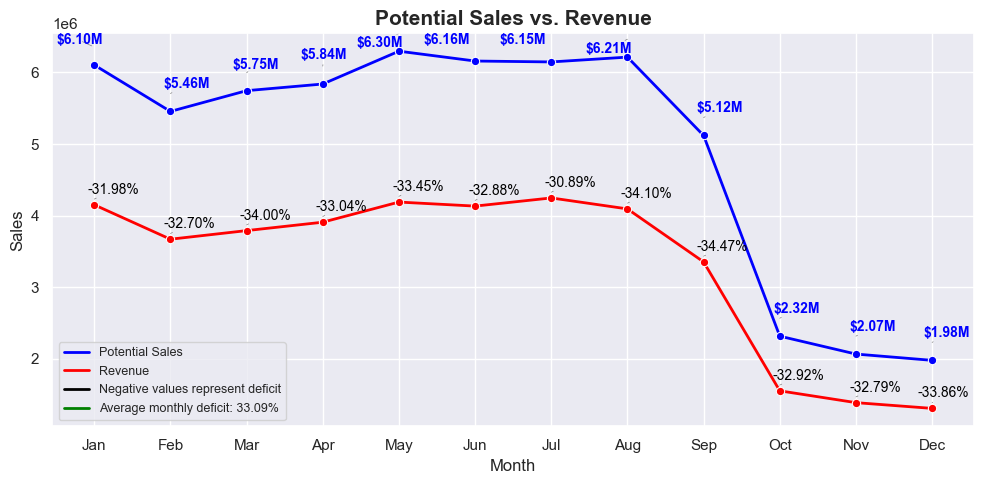

In [694]:
from adjustText import adjust_text 

sales["Revenue Amount"] = (sales["Revenue"].str.replace("%", "").astype(float) / 100) * sales["Potential Sales"]
sales["Deficit Label"] = sales["Deficit"].str.replace("%", "").astype(float).apply(lambda x: f"-{x:.2f}%")
sales["Potential Sales Label"] = sales["Potential Sales"].apply(lambda x: f"${x/1e6:.2f}M")

plt.figure(figsize=(10, 5))
sns.lineplot(data=sales, x='Month', y='Potential Sales', marker='o', linewidth=2, color='blue', label="Potential Sales")
sns.lineplot(data=sales, x='Month', y='Revenue Amount', marker='o', linewidth=2, color='red', label="Revenue")
texts = []

for i, txt in enumerate(sales["Deficit Label"]):
    text = plt.text(sales["Month"][i], sales["Revenue Amount"][i] + 80000, txt, ha='center', fontsize=10, color='black')
    texts.append(text)

for i, txt in enumerate(sales["Potential Sales Label"]):
    text = plt.text(sales["Month"][i], sales["Potential Sales"][i] + 250000, txt, ha='center', fontsize=10, color='blue', fontweight='bold')
    texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Potential Sales vs. Revenue", fontweight='bold', fontsize=15)

legend_labels = [
    "Potential Sales",
    "Revenue",
    "Negative values represent deficit",
    "Average monthly deficit: 33.09%"
]

legend_colors = ['blue', 'red', 'black', 'green']
legend_handles = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors]

# Modify Legend and Move it Outside the Chart
#plt.legend(legend_handles, legend_labels, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.legend(handles=legend_handles, labels=legend_labels, fontsize=9)
plt.grid(True)
plt.tight_layout()

plt.show()



### **3. How do cancellations impact revenue?**

**Key Findings:**

*   The average monthly deficit is 33.09%, meaning that one-third of potential sales are lost due to cancellations.
*   The Revenue Percentage fluctuates between 65.53% and 69.11%, showing that revenue performance is sensitive to cancellations.
*   The lowest revenue percentage (65.53%) corresponds to the highest deficit (34.47%), reinforcing the negative impact of cancellations.

**How Cancellations Affect Revenue:**

📉 **Higher Cancellations = Lower Revenue:**

*   When more orders are canceled, the percentage of completed sales decreases, leading to lower actual revenue.
*   This is evident in months where the deficit is above 34%, resulting in revenue percentages closer to 65%.

📊 **Revenue Stability Depends on Controlling Cancellations:**

*   Months with lower deficits (below 31%) tend to have higher revenue percentages (~69%).
*   If cancellations were reduced by just 5%, the revenue percentage could increase to ~70%, leading to significant financial gains.


------------

## **Cancellations:**

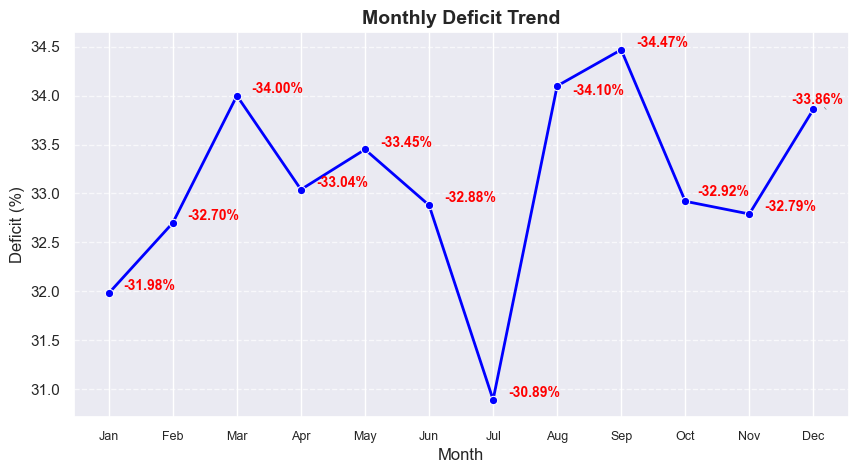

In [689]:
from adjustText import adjust_text  

sales["Deficit Value"] = sales["Deficit"].str.replace("%", "").astype(float)
sales["Deficit Label"] = sales["Deficit Value"].apply(lambda x: f"-{x:.2f}%")
sales["Month"] = pd.Categorical(sales["Month"], categories=sales["Month"].unique(), ordered=True)
cancel_rate = sales.sort_values("Month")

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=cancel_rate, x="Month", y="Deficit Value", marker='o', linewidth=2, color='blue')
xticks = range(len(cancel_rate ))  
plt.xticks(xticks, sales["Month"]) 
texts = []
for i, txt in enumerate(sales["Deficit Label"]):
    text = plt.text(xticks[i] + 0.2, sales["Deficit Value"][i] + 0,  # Small shift for clarity
                    txt, ha='left', fontsize=10, color='red', fontweight='bold')
    texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.title("Monthly Deficit Trend", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Deficit (%)", fontsize=12)
plt.xticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [692]:
cancel_rate = sales[['Month', 'Deficit']]
cancel_rate

,Month,Deficit
0,Jan,31.98%
1,Feb,32.70%
2,Mar,34.00%
3,Apr,33.04%
4,May,33.45%
5,Jun,32.88%
6,Jul,30.89%
7,Aug,34.10%
8,Sep,34.47%
9,Oct,32.92%


### **1. What percentage of total orders are canceled?**

* The average percentage of total orders canceled is 33.09%.
* This means that, on average, 33.09% of all orders were canceled across the 12 months. 🚀

---

**Cancelaltion Probability x Month x Product**

In [531]:
df = df.groupby(['Month', 'Product Type', 'Order Status'], observed=True)['Sales'].sum().unstack(fill_value=0)
df.columns = ['Cancelled', 'Completed']
df['Potential Sales'] = df['Cancelled'] + df['Completed']
df['Cancelled Orders %'] = (df['Cancelled'] / df['Potential Sales']) * 100  
df = df.reset_index().sort_values(by=["Month", "Cancelled Orders %"], ascending=True)
df['Cancelled Orders %'] = df['Cancelled Orders %'].apply(lambda x: f"{x:.2f}%")

df.head()

,Month,Product Type,Cancelled,Completed,Potential Sales,Cancelled Orders %
1,Jan,Laptop,370684.28,942944.64,1313628.92,28.22%
0,Jan,Headphones,161808.64,365875.34,527683.98,30.66%
3,Jan,Smartwatch,395467.00,837457.57,1232924.57,32.08%
4,Jan,Tablet,406064.66,847438.64,1253503.30,32.39%
2,Jan,Smartphone,618292.64,1157864.02,1776156.66,34.81%


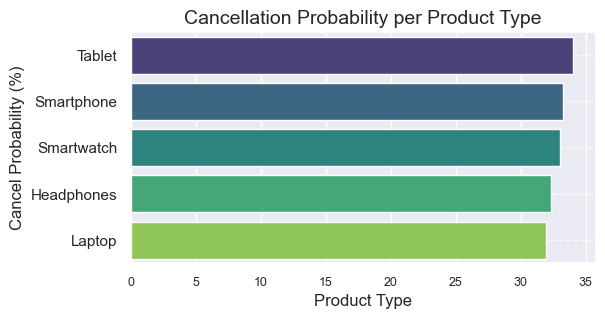

In [620]:
df = df.groupby(['Product Type', 'Order Status'], observed=True)['Sales'].sum().unstack(fill_value=0)

df['Potential Sales'] = df['Cancelled'] + df['Completed']
df['Cancel Probability %'] = (df['Cancelled'] / df['Potential Sales']) * 100  
df = df.sort_values(by="Cancel Probability %", ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Cancel Probability %', y='Product Type', hue='Product Type', palette="viridis") #legend=False
plt.title("Cancellation Probability per Product Type", fontsize=14)
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Cancel Probability (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=9)

plt.show()


In [ ]:
df

Order Status,Cancelled,Completed,Potential Sales,Cancel Probability %
Product Type,,,,
Tablet,3989368.16,7722632.25,11712000.41,34.062227
Smartphone,5780051.97,11580289.76,17360341.73,33.294575
Smartwatch,4637681.83,9398591.23,14036273.06,33.040693
Headphones,1306749.24,2734651.00,4041400.24,32.334071
Laptop,3930334.72,8365905.25,12296239.97,31.963712


**Bayesian Approach**

Our goal is to identify which product types are most likely to be cancelled based on past data. Instead of just looking at the total number of cancellations, we use Bayesian probability to update our belief about a product’s cancellation likelihood when we receive new data.

In [ ]:
# Bayesian
product_prior = df.groupby('Product Type')['Potential Sales'].sum() / df['Potential Sales'].sum()
cancel_likelihood = df.groupby('Product Type')['Cancelled'].sum() / df.groupby('Product Type')['Potential Sales'].sum()
p_cancelled = df['Cancelled'].sum() / df['Potential Sales'].sum()
bayes_posterior = (cancel_likelihood * product_prior) / p_cancelled * 100
bayes_posterior = bayes_posterior.to_frame(name="Cancelled Probability %")
bayes_posterior["Cancelled Probability %"] = bayes_posterior["Cancelled Probability %"].apply(lambda x: f"{x:.2f}%")
bayes_posterior["Cancelled Probability %"] = bayes_posterior["Cancelled Probability %"].str.rstrip('%').astype(float)
bayes_posterior = bayes_posterior.sort_values(by="Cancelled Probability %", ascending=False)
bayes_posterior["Cancelled Probability %"] = bayes_posterior["Cancelled Probability %"].apply(lambda x: f"{x:.2f}%")

bayes_posterior

,Cancelled Probability %
Product Type,
Smartphone,29.42%
Smartwatch,23.61%
Tablet,20.31%
Laptop,20.01%
Headphones,6.65%


### **2. Are certain product types more likely to be canceled?**

**📊 Key Findings**

- **📱 Tablets** have the highest cancellation rate at **34.06%**, followed by **Smartphones (33.29%)** and **Smartwatches (33.04%)**.  
- **🎧 Headphones and 💻 Laptops** have slightly lower cancellation rates at **32.33% and 31.96%**, respectively.  
- **🔍 Bayesian Analysis:** Given an order cancellation, it is most likely to have been from a **Smartphone (29.42%)**, followed by **Smartwatches (23.61%)**.  
- **🟢 Headphones** have the lowest Bayesian probability of being canceled at **6.65%**, making them the least likely product type to be affected by cancellations.  


---


### **3. What are the common reasons for cancellations?**

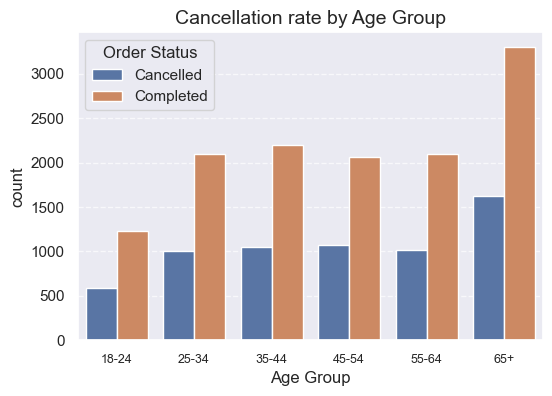

In [833]:
bins = [18, 24, 34, 44, 54, 64, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(6, 4))
sns.countplot(x='Age Group', hue='Order Status', data=df)
plt.title("Cancellation rate by Age Group", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=9)    
plt.show()


In [834]:
cancellation_age_group = df.groupby(['Age Group', 'Order Status'], observed=False).size().unstack(fill_value=0)
cancellation_age_group

Order Status,Cancelled,Completed
Age Group,,
18-24,584,1233
25-34,1002,2095
35-44,1051,2194
45-54,1070,2059
55-64,1011,2096
65+,1627,3303


### **Customer Cancellation Analysis**  

**Do younger customers cancel more than older ones?**  

We analyze cancellation trends based on age groups to determine whether younger customers cancel more frequently than older ones.  

**Cancellations by Age Group**  

| **Age Group** | **Cancelled** | **Completed** | **Total Orders** | **Cancellation Rate** |
|--------------|--------------|--------------|--------------|------------------|
| 18-24       | 584          | 1233         | **1,817**    | **32.1%**        |
| 25-34       | 1002         | 2095         | **3,097**    | **32.4%**        |
| 35-44       | 1051         | 2194         | **3,245**    | **32.4%**        |
| 45-54       | 1070         | 2059         | **3,129**    | **34.2%**        |
| 55-64       | 1011         | 2096         | **3,107**    | **32.5%**        |
| 65+         | 1627         | 3303         | **4,930**    | **33.0%**        |

🔹 **Insight:** The **45-54** age group has the highest cancellation rate at **34.2%**, while the youngest group (18-24) has the lowest at **32.1%**.  
🔹 **Conclusion:** **Older customers (45+) tend to cancel slightly more often than younger ones.** However, cancellation rates across all age groups remain relatively close.  


---

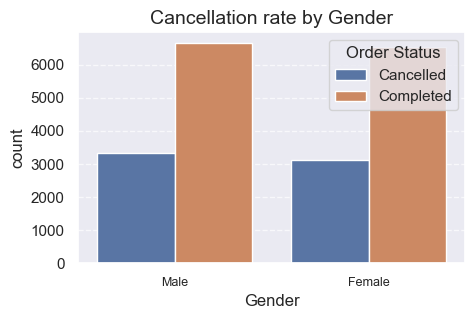

In [836]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', hue='Order Status', data=df)
plt.title("Cancellation rate by Gender", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=9)    
plt.show()


In [837]:
cancellation_gender = df.groupby(['Gender', 'Order Status'], observed=False).size().unstack(fill_value=0)
cancellation_gender 

Order Status,Cancelled,Completed
Gender,,
Female,3122,6522
Male,3325,6648


**Is there a gender trend in cancellations?**  

We analyze whether one gender cancels more frequently than the other.  

**Cancellations by Gender**  

| **Gender**  | **Cancelled** | **Completed** | **Total Orders** | **Cancellation Rate** |
|------------|--------------|--------------|--------------|------------------|
| **Female** | 3,122        | 6,522        | **9,644**    | **32.4%**        |
| **Male**   | 3,325        | 6,648        | **9,973**    | **33.3%**        |

🔹 **Insight:** Males have a **slightly higher** cancellation rate (**33.3%**) than females (**32.4%**), but the difference is minimal (~0.9%).  
🔹 **Conclusion:** **There is no strong gender trend in cancellations.** Both genders cancel at similar rates.  


---


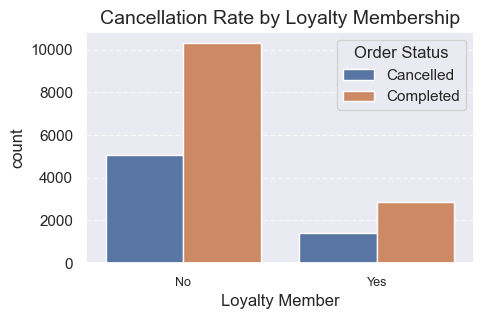

In [756]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Loyalty Member', hue='Order Status', data=df)
plt.title("Cancellation Rate by Loyalty Membership", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=9)
plt.show()

In [ ]:
loyalty_data = df.groupby(['Loyalty Member', 'Order Status']).size().unstack(fill_value=0)
loyalty_data

Order Status,Cancelled,Completed
Loyalty Member,,
No,5051,10300
Yes,1396,2870


### **Loyalty Membership & Cancellations**

**Are Non-Loyalty Members More Likely to Cancel?**

We compare the cancellation rates between loyalty members and non-members to determine if non-loyalty members are more prone to canceling orders.

*Cancellation Rate by Loyalty Membership**
| **Loyalty Member** | **Cancelled Orders** | **Completed Orders** | **Total Orders** | **Cancellation Rate (%)** |
|-------------------|------------------|------------------|--------------|----------------------|
| **No**           | 5,051            | 10,300          | 15,351       | **32.91%** |
| **Yes**          | 1,396            | 2,870           | 4,266        | **32.73%** |

🔹 **Insight:**  
- **Non-loyalty members** have a slightly higher cancellation rate (**32.91%**) than loyalty members (**32.73%**), but the difference is minimal.  
- Both groups have **similar cancellation patterns**, suggesting that loyalty membership does not significantly reduce cancellations.  

🔹 **Conclusion:**  

❌ **Non-loyalty members are only slightly more likely to cancel.**  

✅ **Loyalty programs may not be a strong factor in reducing cancellations.**  


---

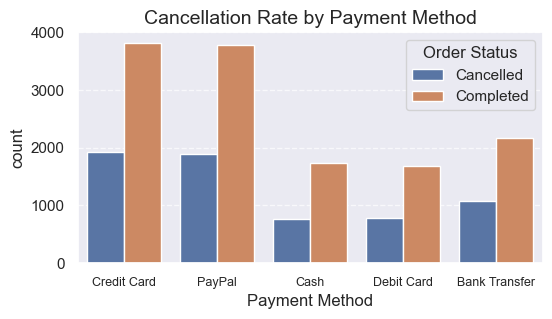

In [757]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Payment Method', hue='Order Status', data=df)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=9)
plt.title("Cancellation Rate by Payment Method", fontsize=14)
plt.show()


In [ ]:
payment_cancellation = df.groupby(['Payment Method', 'Order Status']).size().unstack(fill_value=0)
payment_cancellation

Order Status,Cancelled,Completed
Payment Method,,
Bank Transfer,1072,2174
Cash,765,1727
Credit Card,1931,3810
Debit Card,787,1684
PayPal,1892,3775


### **Payment Method & Cancellations**

**Do Cancellations happen more with Cash-on-Delivery (COD) vs. Prepaid?** 

To analyze the impact of payment methods on cancellations, we compare the cancellation rates across different payment types.

**Order Status Breakdown by Payment Method**
| **Payment Method**  | **Cancelled Orders** | **Completed Orders** | **Total Orders** | **Cancellation Rate (%)** |
|--------------------|------------------|------------------|--------------|----------------------|
| **Bank Transfer**  | 1,072            | 2,174            | 3,246        | **33.02%** |
| **Cash** (COD)    | 765              | 1,727            | 2,492        | **30.71%** |
| **Credit Card**    | 1,931            | 3,810            | 5,741        | **33.64%** |
| **Debit Card**     | 787              | 1,684            | 2,471        | **31.85%** |
| **PayPal**         | 1,892            | 3,775            | 5,667        | **33.38%** |

🔹 **Key Insights:**
- **No Major Spike in COD Cancellations**  
  - Cash-on-Delivery (COD) has a **30.71%** cancellation rate, which is **lower** than most prepaid methods.
- **Credit Card and PayPal Have the Highest Cancellation Rates (~33.6%)**  
  - **Prepaid methods like Credit Card and PayPal have slightly higher cancellation rates** than COD.
  - This suggests cancellations could be due to **customer disputes, chargebacks, or refund policies** rather than payment risk.
- **Bank Transfer & Debit Card Perform Similarly**  
  - Both methods show **31.85-33.02%** cancellation rates, **slightly lower than Credit Cards and PayPal.**

🔹 **Conclusion:**

* 📊 Contrary to expectations, COD does not have the highest cancellation rate.
* 💳 Credit Card and PayPal transactions see slightly higher cancellations, possibly due to refund policies or customer disputes. 
* 🔍 Cancellations seem to be driven more by external factors (e.g., product availability, customer preferences) than by payment method alone.


---

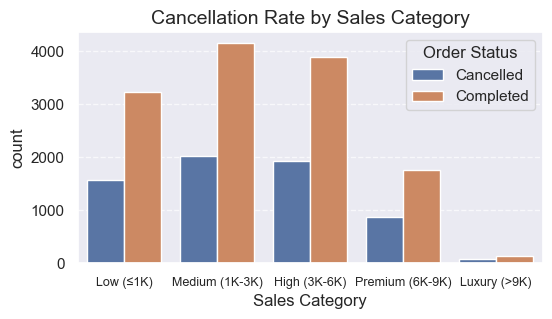

In [767]:
total_price = [5538.33, 741.09, 1855.84, 3164.76, 41.5, 83.0, 7603.47, 4175.64, 
               2470.3, 7120.71, 3379.32, 7911.9, 5068.98, 4747.14, 103.75, 124.5, 
               988.12, 844.83, 6758.64, 1582.38, 2783.76, 4224.15, 5913.81, 186.75, 
               62.25, 3955.95, 791.19, 145.25, 1729.21, 6329.52, 207.5, 1482.18, 
               166.0, 3247.72, 463.96, 1976.24, 2373.57, 1689.66, 2223.27, 247.03, 
               20.75, 4639.6, 1391.88, 3711.68, 927.92, 8448.3, 1235.15, 2534.49, 
               494.06, 2319.8, 4130.2, 2796.09, 3446.8, 5367.6, 6743.2, 5698.4, 
               674.32, 3419.04, 3145.64, 1083.54, 6291.28, 7977.76, 2757.0, 4135.5, 
               3611.8, 786.41, 3676.0, 2697.28, 11396.8, 1139.68, 4558.72, 10257.12, 
               7864.1, 1805.9, 1378.5, 3371.6, 9117.44, 2022.96, 1572.82, 6068.88, 
               4045.92, 2167.08, 2279.36, 2889.44, 1838.0, 361.18, 3932.05, 2359.23, 
               4595.0, 4718.46, 1444.72, 6838.08, 5394.56, 4720.24, 919.0, 2528.26,]

bins = [0, 1000, 3000, 6000, 9000, 12000]  
labels = ['Low (≤1K)', 'Medium (1K-3K)', 'High (3K-6K)', 'Premium (6K-9K)', 'Luxury (>9K)']    

df['Sales Category'] = pd.cut(df['Total Price'], bins=bins, labels=labels, include_lowest=True)

sales_category_cancellation = df.groupby(['Order Status', 'Sales Category'], observed=False).size().unstack(fill_value=0)

plt.figure(figsize=(6, 3))
sns.countplot(x='Sales Category', hue='Order Status', data=df)
plt.xticks(fontsize=9)
plt.title("Cancellation Rate by Sales Category", fontsize=14)
plt.xticks(fontsize=9) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [759]:
sales_category_cancellation

Sales Category,Low (≤1K),Medium (1K-3K),High (3K-6K),Premium (6K-9K),Luxury (>9K)
Order Status,,,,,
Cancelled,1561,2014,1928,873,71
Completed,3234,4148,3892,1763,133


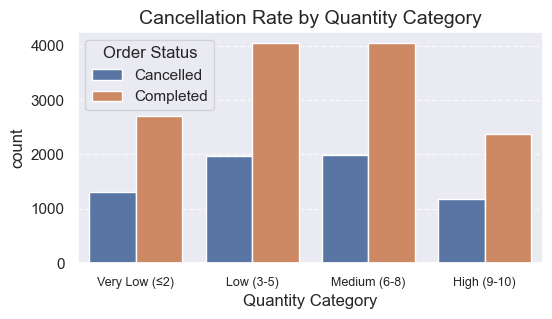

In [ ]:
bins = [0, 2, 5, 8, 10]  
labels = ['Very Low (≤2)', 'Low (3-5)', 'Medium (6-8)', 'High (9-10)']

df['Quantity Category'] = pd.cut(df['Quantity'], bins=bins, labels=labels, include_lowest=True)

quantity_category_cancellation = df.groupby(['Order Status', 'Quantity Category'], observed=False).size().unstack(fill_value=0)

plt.figure(figsize=(6, 3))
sns.countplot(x='Quantity Category', hue='Order Status', data=df)
plt.xticks(fontsize=9)
plt.title("Cancellation Rate by Quantity Category", fontsize=14)
plt.xticks(fontsize=9) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [772]:
quantity_category_cancellation

Quantity Category,Very Low (≤2),Low (3-5),Medium (6-8),High (9-10)
Order Status,,,,
Cancelled,1318,1968,1981,1180
Completed,2698,4046,4042,2384


**Do people who order more items tend to cancel more?**  

We analyze whether customers who purchase in bulk have a higher cancellation rate.  

**Cancellations by Quantity Category**  

| **Quantity Category**   | **Cancelled** | **Completed** | **Total Orders** | **Cancellation Rate** |
|-------------------------|--------------|--------------|--------------|------------------|
| **Very Low (≤2)**      | 1,318        | 2,698        | **4,016**    | **32.8%**        |
| **Low (3-5)**          | 1,968        | 4,046        | **6,014**    | **32.7%**        |
| **Medium (6-8)**       | 1,981        | 4,042        | **6,023**    | **32.9%**        |
| **High (9-10)**        | 1,180        | 2,384        | **3,564**    | **33.1%**        |

🔹 **Insight:** The cancellation rate is **fairly consistent across all quantity categories** (~32.7% to 33.1%).  
🔹 **Conclusion:** Customers who order more items do not necessarily cancel more frequently. 


---

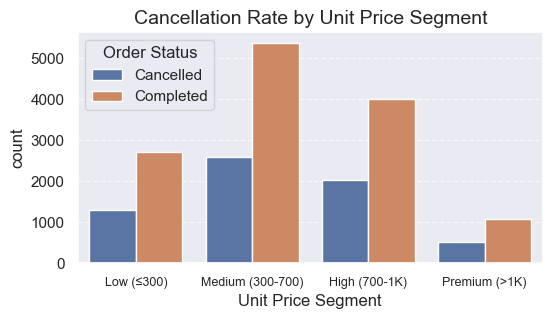

In [769]:
bins = [0, 300, 700, 1000, float('inf')]  
labels = ['Low (≤300)', 'Medium (300-700)', 'High (700-1K)', 'Premium (>1K)'] 

df['Unit Price Segment'] = pd.cut(df['Unit Price'], bins=bins, labels=labels, right=False)
unit_price_cancellation = df.groupby(['Order Status', 'Unit Price Segment'], observed=False).size().unstack(fill_value=0)

plt.figure(figsize=(6, 3))
sns.countplot(x='Unit Price Segment', hue='Order Status', data=df)
plt.xticks(fontsize=9)
plt.title("Cancellation Rate by Unit Price Segment", fontsize=14)
plt.xticks(fontsize=9) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [773]:
unit_price_cancellation

Unit Price Segment,Low (≤300),Medium (300-700),High (700-1K),Premium (>1K)
Order Status,,,,
Cancelled,1303,2592,2032,520
Completed,2711,5370,4005,1084


**Are Expensive Items Canceled More Often?**  

We analyze whether higher-priced items have a higher cancellation rate.  

**Cancellations by Unit Price Segment**  

| **Unit Price Segment** | **Cancelled** | **Completed** | **Total Orders** | **Cancellation Rate** |
|------------------------|--------------|--------------|--------------|------------------|
| **Low (≤300)**        | 1,303        | 2,711        | **4,014**    | **32.5%**        |
| **Medium (300-700)**  | 2,592        | 5,370        | **7,962**    | **32.5%**        |
| **High (700-1K)**     | 2,032        | 4,005        | **6,037**    | **33.7%**        |
| **Premium (>1K)**     | 520          | 1,084        | **1,604**    | **32.4%**        |

🔹 **Insight:** Cancellation rates remain **fairly consistent across price segments** (~32.4% to 33.7%).  
🔹 **Conclusion:** Expensive items are not canceled significantly more often than cheaper ones. 


---

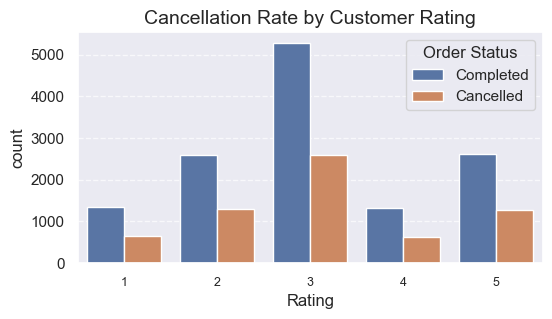

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Rating', hue='Order Status', data=df)
plt.xticks(fontsize=9)
plt.title("Cancellation Rate by Customer Rating", fontsize=14)
plt.xticks(fontsize=9) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
rating_order_cancellation = df.groupby(['Order Status', 'Rating']).size().unstack(fill_value=0)
rating_order_cancellation

Rating,1,2,3,4,5
Order Status,,,,,
Cancelled,646,1303,2602,627,1269
Completed,1342,2591,5277,1335,2625


### **Ratings & Cancellations**

**Do lower ratings indicate dissatisfaction, leading to cancellations?**  

To determine whether lower ratings correlate with cancellations, we analyze the distribution of canceled and completed orders by rating.

**Order Status Breakdown by Rating**
| **Rating** | **Cancelled Orders** | **Completed Orders** | **Total Orders** | **Cancellation Rate (%)** |
|-----------|------------------|------------------|--------------|----------------------|
| **1**     | 646              | 1,342            | 1,988        | **32.49%** |
| **2**     | 1,303            | 2,591            | 3,894        | **33.45%** |
| **3**     | 2,602            | 5,277            | 7,879        | **33.02%** |
| **4**     | 627              | 1,335            | 1,962        | **31.96%** |
| **5**     | 1,269            | 2,625            | 3,894        | **32.58%** |

🔹 **Key Insights:**
- **Higher Cancellations for Mid-Low Ratings:**  
  - Ratings **2 & 3 have the highest cancellation rates (~33%)**, suggesting moderate dissatisfaction leads to cancellations.
- **Lowest Cancellations at Rating 4:**  
  - At **31.96%**, Rating **4 has the lowest cancellation rate**, indicating more satisfied customers.
- **Surprisingly High Cancellations at Rating 5:**  
  - **32.58%** of 5-star ratings still result in cancellations, possibly due to **order fulfillment issues** rather than dissatisfaction.

🔹 **Conclusion:**

📉 Lower ratings (1-3) correlate with slightly higher cancellation rates, confirming dissatisfaction contributes to cancellations.  

🔍 However, cancellations also occur at higher ratings (4-5), suggesting external factors like inventory issues, delays, or policy changes might be at play. 


---

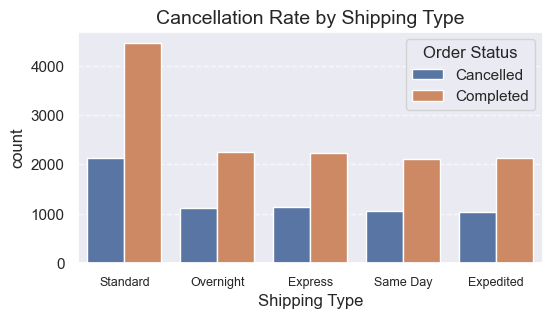

In [794]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Shipping Type', hue='Order Status', data=df)
plt.xticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Cancellation Rate by Shipping Type", fontsize=14)
plt.show()

In [ ]:
cancel_rate_shipping = df.groupby(['Shipping Type', 'Order Status']).size().unstack(fill_value=0)
cancel_rate_shipping

Order Status,Cancelled,Completed
Shipping Type,,
Expedited,1025,2122
Express,1139,2227
Overnight,1110,2247
Same Day,1046,2103
Standard,2127,4471


**Do standard shipping orders get canceled more often than other shipping types?**  

We can calculate the **cancellation rate** for each shipping type:  

**Cancellation Rates by Shipping Type**  

| **Shipping Type** | **Cancelled** | **Completed** | **Total Orders** | **Cancellation Rate (%)** |
|------------------|-------------|-------------|----------------|----------------------|
| Expedited       | 1,025       | 2,122       | 3,147          | **32.6%** |
| Express         | 1,139       | 2,227       | 3,366          | **33.8%** |
| Overnight       | 1,110       | 2,247       | 3,357          | **33.1%** |
| Same Day        | 1,046       | 2,103       | 3,149          | **33.2%** |
| **Standard**    | **2,127**   | **4,471**   | **6,598**      | **32.2%** |

**Insights:**  

✅ Standard Shipping has the highest number of cancellations (2,127), but not the highest cancellation rate (32.2%).

✅ Express Shipping has the highest cancellation rate (33.8%), followed by Overnight (33.1%) and Same Day (33.2%). 

✅ Cancellations are relatively consistent across shipping types, meaning Standard Shipping is not uniquely affected.



---

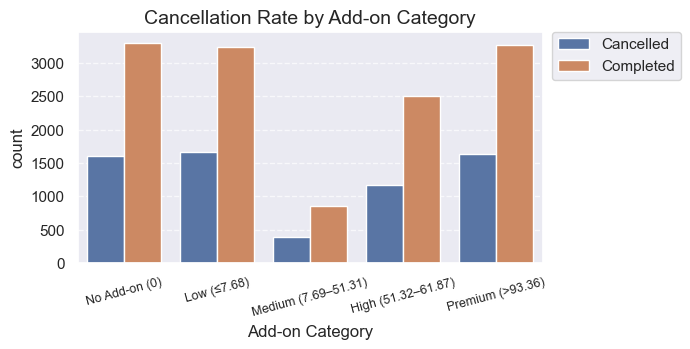

In [793]:
bins = [0, 7.68, 51.31, 61.87, 93.36, float('inf')]  
labels = ['No Add-on (0)', 'Low (≤7.68)', 'Medium (7.69–51.31)', 'High (51.32–61.87)', 'Premium (>93.36)']  

df['Add-on Category'] = pd.cut(df['Add-on Total'], bins=bins, labels=labels, include_lowest=True)
add_on_cancellation = df.groupby(['Order Status', 'Add-on Category'], observed=False).size().unstack(fill_value=0)

plt.figure(figsize=(6, 3))
sns.countplot(x='Add-on Category', hue='Order Status', data=df)
plt.xticks(fontsize=9)
plt.title("Cancellation Rate by Add-on Category", fontsize=14)
plt.xticks(fontsize=9, rotation=15) 
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [791]:
add_on_cancellation 

Add-on Category,No Add-on (0),Low (≤7.68),Medium (7.69–51.31),High (51.32–61.87),Premium (>93.36)
Order Status,,,,,
Cancelled,1600,1664,391,1163,1629
Completed,3305,3240,852,2499,3274


**Do people who buy add-ons cancel less because they are more committed to the purchase?**  

We analyze the relationship between add-on purchases and cancellations by calculating the **cancellation rate** for each add-on category.  

**Cancellation Rates by Add-on Total**  


| **Add-on Category** | **Cancelled** | **Completed** | **Total Orders** | **Cancellation Rate (%)** |
|--------------------|-------------|-------------|----------------|----------------------|
| No Add-on (0)     | 1,600       | 3,305       | 4,905          | **32.6%** |
| Low (≤7.68)       | 1,664       | 3,240       | 4,904          | **33.9%** |
| Medium (7.69–51.31) | 391         | 852         | 1,243          | **31.4%** |
| High (51.32–61.87) | 1,163       | 2,499       | 3,662          | **31.8%** |
| Premium (>93.36)   | **1,629**   | **3,274**   | **4,903**      | **33.2%** |

**Insights:**  

✅ Customers who purchase add-ons at a medium or high level tend to cancel slightly less than those who don't buy add-ons. 

✅ However, premium add-on buyers cancel at a similar rate to those who don’t purchase add-ons (~33%). 

✅ There isn’t a strong trend suggesting that purchasing add-ons significantly reduces cancellation rates.
